### Importing Libraries

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

In [48]:
#we took iris dataset from sklern library
from sklearn.datasets import load_iris

In [49]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [50]:
#Independent feature
X=pd.DataFrame(iris['data'],columns=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
#dependent feature
y=iris['target']

In [52]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [53]:
##apply desion tree classifiter
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [54]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier()

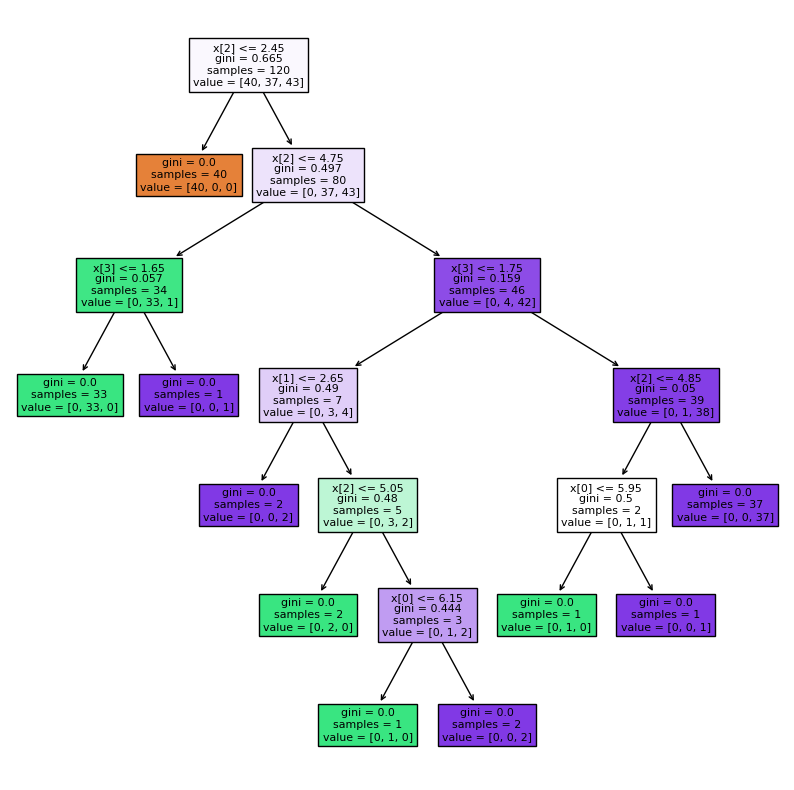

In [55]:
##visualized the decision tree 
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(treeclassifier,filled=True)
plt.show()

**Here we got the leaf node in 1st split (with gini =0.00),  so we can end the decission Tree in the 1st leaf node**

### Post pruning
**Here we select the 1st leaf node(max_depth) after creation of the entire Decision Tree .**

In [56]:
##apply desion tree classifiter
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier(max_depth=2)

In [57]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

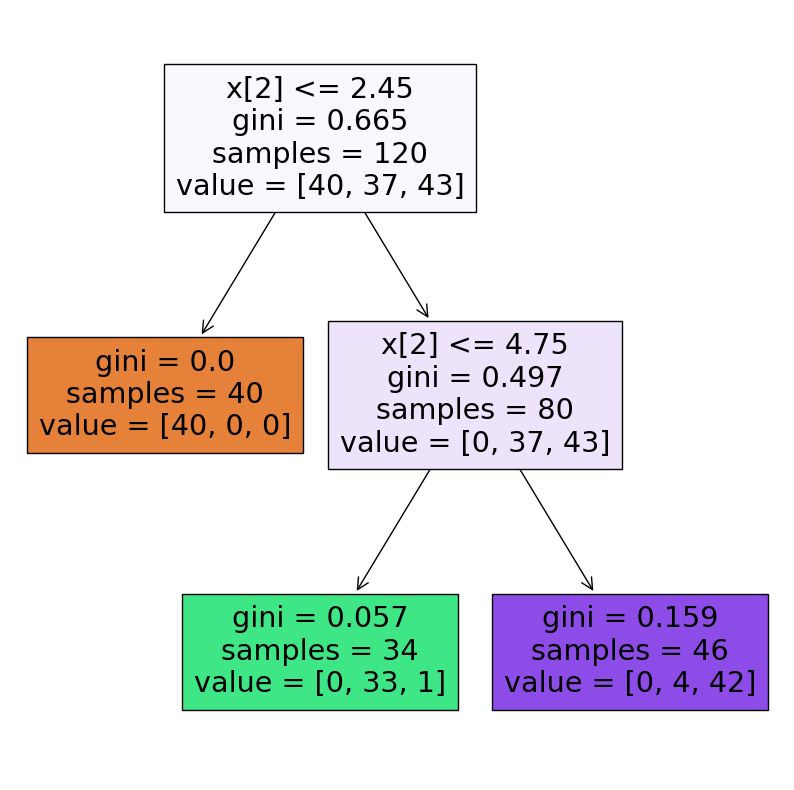

In [58]:
##visualized the decision tree 
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(treeclassifier,filled=True)
plt.show()

In [59]:
## prediction for train data 
y_pred_train=treeclassifier.predict(X_train)
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))
print(classification_report(y_train,y_pred_train))

[[40  0  0]
 [ 0 33  4]
 [ 0  1 42]]
0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.89      0.93        37
           2       0.91      0.98      0.94        43

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [60]:
## prediction for test data 
y_pred_test=treeclassifier.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(y_test,y_pred_test))
print(accuracy_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



### Hyperperameter Tuning / Pre pruning
 **for large dataset we use pre pruning by tuning the perameters of Decision Tree , Because for the large dataset if we create the whole Decision Tree ,its time complexity will be high .** 

In [62]:
param={
    'criterion' : ["gini", "entropy", "log_loss"],
    'splitter' : ["best", "random"],
    'max_depth':[1,2,3,4,5],
    'max_features' :["auto", "sqrt", "log2"]
}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
treemodel=DecisionTreeClassifier()

In [65]:
grid=GridSearchCV(treemodel,param_grid=param,cv=5,scoring='accuracy')

In [66]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [68]:
grid.best_score_

0.95

In [69]:
# prediction for train data
y_pred_grid_train=grid.predict(X_train)

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_train,y_pred_grid_train))
print(confusion_matrix(y_train,y_pred_grid_train))
print(classification_report(y_train,y_pred_grid_train))

0.9583333333333334
[[40  0  0]
 [ 0 33  4]
 [ 0  1 42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.89      0.93        37
           2       0.91      0.98      0.94        43

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [71]:
# prediction for test data
y_pred_grid_test=grid.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred_grid_test))
print(confusion_matrix(y_test,y_pred_grid_test))
print(classification_report(y_test,y_pred_grid_test))

0.9333333333333333
[[10  0  0]
 [ 0 11  2]
 [ 0  0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30

